In [13]:
import numpy as np

In [1]:
from data_generator import DataGenerator

In [2]:
generator = DataGenerator(10, 50)

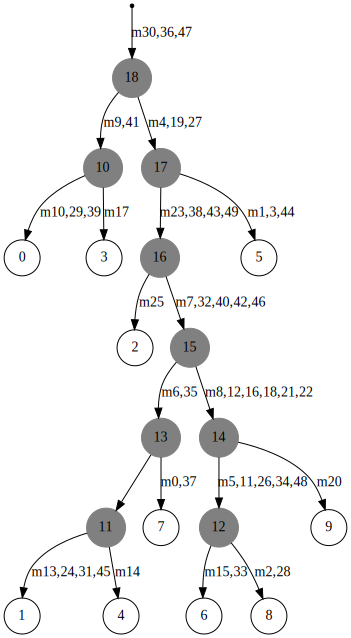

In [3]:
# generate a random (cell lineage) tree
generator.random_tree()
# visualize the generated tree
generator.tree.to_graphviz()

from tree import MutationTree
mut_tree = MutationTree()

# 
mut_tree.fit_structure(generator.tree)

In [4]:
generator.random_mutations(mut_prop = 0.5, genotype_freq = [1/3, 1/3, 1/3])

In [5]:
for gt1, gt2 in zip(generator.gt1, generator.gt2):
    print('%s->%s' % (gt1, gt2))

R->R
A->A
R->H
A->A
R->R
H->A
A->H
R->R
R->H
A->A
H->H
H->R
H->H
A->A
A->A
A->H
H->A
R->R
H->H
R->H
H->R
H->A
R->R
R->R
R->H
R->H
A->H
R->R
R->H
R->H
R->H
A->H
H->H
A->H
R->R
H->H
H->H
R->H
A->A
H->H
A->H
R->H
R->H
H->A
A->A
H->H
H->R
A->H
H->H
H->H


In [6]:
ref, alt = generator.generate_reads()

In [9]:
i = 0 # cell index
j = 0 # locus index
print('Cell %d has %d reference reads and %d alternative reads at locus %d' % (i, ref[i,j], alt[i,j], j))

Cell 0 has 6 reference reads and 0 alternative reads at locus 0


## Tree Inference

### mutation selection

In [18]:
from mutation_detection import filter_mutations, likelihood_matrices
ref, alt, gt1, gt2 = filter_mutations(ref, alt, method = 'threshold', t = 0.5)

### Calculate likelihoods of each cell being mutated / not mutated

In [14]:
likelihoods1, likelihoods2 = likelihood_matrices(ref, alt, generator.gt1, generator.gt2)

0.7407069749719788

In [24]:
print(gt1[0], gt2[0])

H R


In [29]:
i = 0
j = 0
print('Likelihood of cell %d being wildtype at locus %d is %f' % (i, j, np.exp(likelihoods1[i,j])))
print('Likelihood of cell %d being mutated at locus %d is %f' % (i, j, np.exp(likelihoods2[i,j])))

Likelihood of cell 0 being wildtype at locus 0 is 0.740707
Likelihood of cell 0 being mutated at locus 0 is 0.740707


250

### Inference

In [ ]:
from tree_inference import TreeOptimizer
optimizer = TreeOptimizer()
optimizer.fit(likelihoods1, likelihoods2, reversible = True)